In [62]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

from sklearn.preprocessing import PowerTransformer,StandardScaler,LabelEncoder

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,LeaveOneOut,KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression,Lasso,LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from imblearn.over_sampling import SMOTE

import pickle

import warnings
warnings.filterwarnings("ignore")

In [63]:
data=pd.read_excel("Cars_scrapped_details.xlsx",index_col="Unnamed: 0")

In [64]:
data.head()

,Brand,model,variant,auto_Mannual,Mfg_year,Driven_in_km,Fuel,no_Of_Owner,Location,Price(in_Lacs)
0,Maruti,Celerio,VXI,Manual,2014,167450,Petrol,1,Bengaluru,3.66
1,Maruti,Swift,VXI,Manual,2012,56941,Petrol,2,Bengaluru,4.55
2,Maruti,Baleno,ZETA 1.2 K12,Manual,2016,34417,Petrol,1,Bengaluru,6.91
3,Ford,Figo,1.2 TITANIUM PETROL,Manual,2017,22645,Petrol,1,Bengaluru,6.07
4,Hyundai,Elite,ASTA 1.4 CRDI,Manual,2016,43221,Diesel,2,Bengaluru,7.00


In [65]:
data.shape

(5484, 10)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5484 entries, 0 to 5483
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           5484 non-null   object 
 1   model           5484 non-null   object 
 2   variant         5484 non-null   object 
 3   auto_Mannual    5484 non-null   object 
 4   Mfg_year        5484 non-null   int64  
 5   Driven_in_km    5484 non-null   int64  
 6   Fuel            5484 non-null   object 
 7   no_Of_Owner     5484 non-null   int64  
 8   Location        5484 non-null   object 
 9   Price(in_Lacs)  5484 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 471.3+ KB


In [67]:
data.nunique()

Brand               24
model              107
variant            603
auto_Mannual         2
Mfg_year            14
Driven_in_km      4135
Fuel                 4
no_Of_Owner          5
Location            10
Price(in_Lacs)    1013
dtype: int64

In [68]:
data["Brand"].value_counts()

Maruti        2719
Hyundai       1246
Honda          353
Ford           321
Renault        171
Tata           146
Toyota         129
Volkswagen     129
Mahindra        54
MG              41
Datsun          30
Skoda           26
Jeep            26
BMW             25
KIA             24
Nissan          19
Audi            13
Mercedes         5
Jaguar           2
Fiat             1
Ssangyong        1
RENAULT          1
HYUNDAI          1
Landrover        1
Name: Brand, dtype: int64

In [69]:
data['Brand']=data['Brand'].replace({"HYUNDAI":"Hyundai","RENAULT":"Renault"})

In [70]:
data["Brand"].value_counts()

Maruti        2719
Hyundai       1247
Honda          353
Ford           321
Renault        172
Tata           146
Toyota         129
Volkswagen     129
Mahindra        54
MG              41
Datsun          30
Jeep            26
Skoda           26
BMW             25
KIA             24
Nissan          19
Audi            13
Mercedes         5
Jaguar           2
Fiat             1
Ssangyong        1
Landrover        1
Name: Brand, dtype: int64

In [71]:
data['no_Of_Owner'].value_counts()

1    4460
2     918
3      99
4       6
5       1
Name: no_Of_Owner, dtype: int64

In [72]:
data['Fuel'].value_counts()

Petrol          4063
Diesel          1359
Petrol + CNG      61
Petrol + LPG       1
Name: Fuel, dtype: int64

In [73]:
data=data[(data['Brand']!="Jaguar")& (data['Brand']!="Mercedes")& (data['Brand']!="Fiat")& (data['Brand']!="Ssangyong") & (data['Brand']!="Landrover")&(data["no_Of_Owner"]<5)&(data['Fuel']!="Petrol + LPG")]

removing such records that has less info So that our model should not be undrfitted or overfitted.

In [74]:
data.columns.tolist()

['Brand',
 'model',
 'variant',
 'auto_Mannual',
 'Mfg_year',
 'Driven_in_km',
 'Fuel',
 'no_Of_Owner',
 'Location',
 'Price(in_Lacs)']

"Brand": Brand of Cars.
    
"MOdel": Model of the car.
    
"Auto_Manual": Car is Automatic or mannual.
    
"Variant": Type of car.
    
"Mfg_year":Manufacturing year of Car.
    
"Driven in_km": Car drived in kilometers.
    
"Fuel": which type of fuel does the car used.
    
"n_Of_Owner": No. of owners of the car.
    
"Location": Location of the car from which city that car is used.
    
"Price": Price i.e., the target variable in lacs in Indian ruppee..

In [75]:
data.shape

(5472, 10)

In [76]:
data.dtypes

Brand              object
model              object
variant            object
auto_Mannual       object
Mfg_year            int64
Driven_in_km        int64
Fuel               object
no_Of_Owner         int64
Location           object
Price(in_Lacs)    float64
dtype: object

<AxesSubplot:>

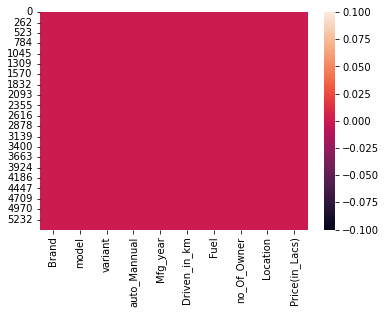

In [77]:
sns.heatmap(data.isna())

No null values.

<AxesSubplot:xlabel='no_Of_Owner'>

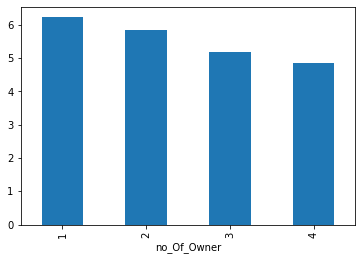

In [16]:
data.groupby("no_Of_Owner")['Price(in_Lacs)'].mean().plot(kind='bar')

Less no of user their Car price are high.

<AxesSubplot:xlabel='Brand'>

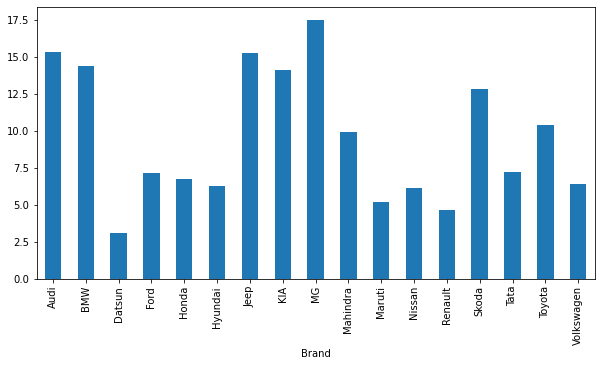

In [17]:
plt.figure(figsize=(10,5))
data.groupby("Brand")['Price(in_Lacs)'].mean().plot(kind='bar')

Mercedes type Brand's car has the highest price.

Datsun type Brand's car has the lowest price.

<AxesSubplot:xlabel='Mfg_year'>

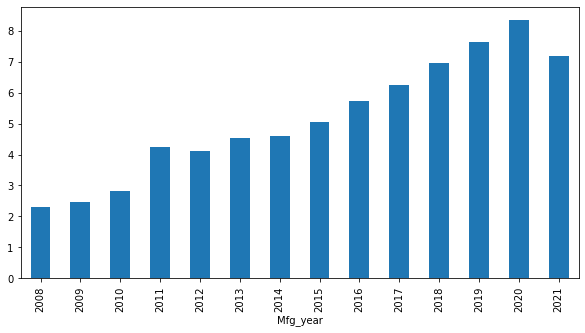

In [18]:
plt.figure(figsize=(10,5))
data.groupby("Mfg_year")['Price(in_Lacs)'].mean().plot(kind='bar')

As the year increases the price of car increasing.

<AxesSubplot:>

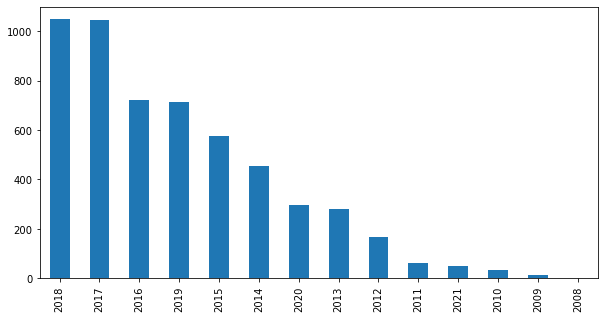

In [19]:
plt.figure(figsize=(10,5))
data['Mfg_year'].value_counts().plot(kind='bar')

The Demand of cars is highly igncreased in the year ogf 2017 and 2018.

<AxesSubplot:xlabel='auto_Mannual'>

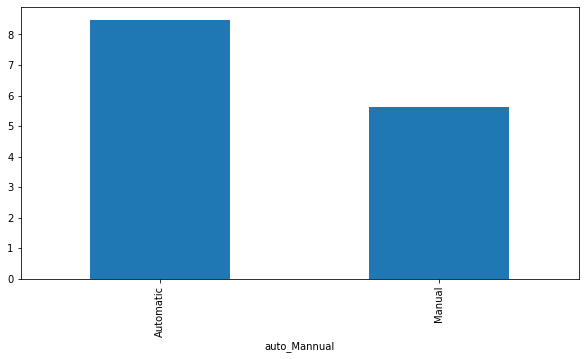

In [20]:
plt.figure(figsize=(10,5))
data.groupby("auto_Mannual")['Price(in_Lacs)'].mean().plot(kind='bar')

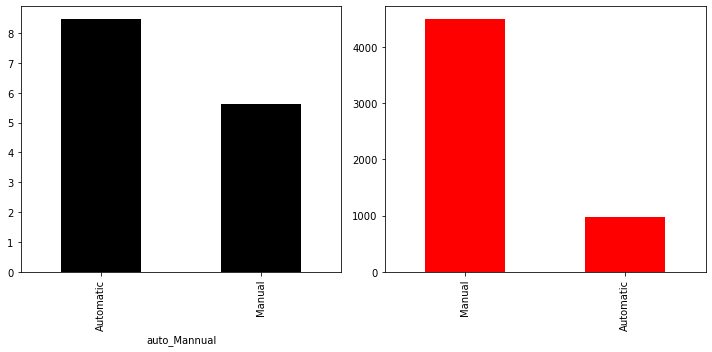

In [21]:
plt.figure(figsize=(10,5))
ax=plt.subplot(1,2,1)
data.groupby("auto_Mannual")['Price(in_Lacs)'].mean().plot(kind='bar',color='black')
ax=plt.subplot(1,2,2)
data['auto_Mannual'].value_counts().plot(kind='bar',color='r')
plt.tight_layout()

As we can see the no. for mannual car type are used more than the automatic but the price are high for automatic cars.

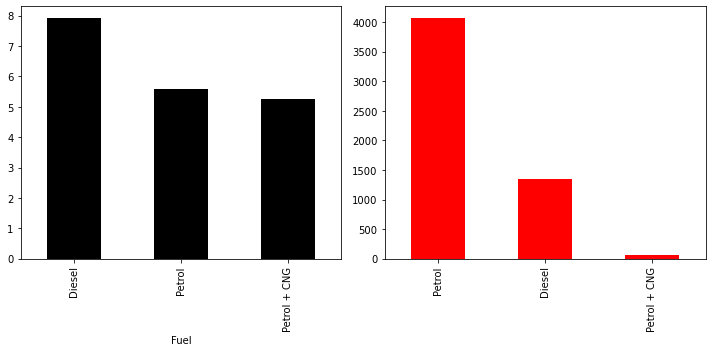

In [39]:
plt.figure(figsize=(10,5))
ax=plt.subplot(1,2,1)
data.groupby("Fuel")['Price(in_Lacs)'].mean().plot(kind='bar',color='black')
ax=plt.subplot(1,2,2)
data['Fuel'].value_counts().plot(kind='bar',color='r')
plt.tight_layout()


Diesel fuel container type of cars has high prices.

<AxesSubplot:xlabel='Location'>

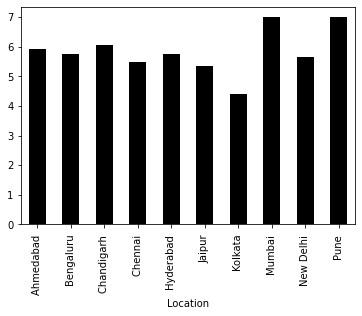

In [23]:
data.groupby("Location")['Price(in_Lacs)'].mean().plot(kind='bar',color='black')

Mumbai and Pune are having most expensive sellng of cars.

<AxesSubplot:xlabel='model'>

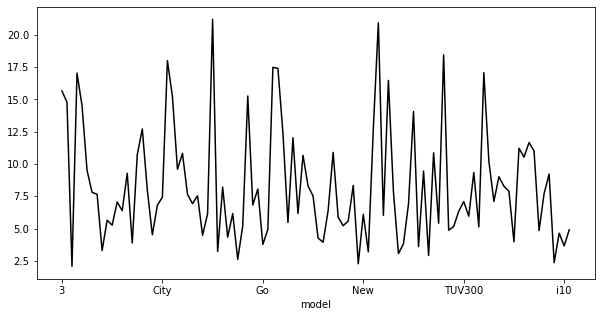

In [40]:
plt.figure(figsize=(10,5))
data.groupby("model")['Price(in_Lacs)'].mean().plot(kind='line',color='black',label=True)

Benz type of model hasg highest Price.

A type of model has the lowest Price.

<AxesSubplot:xlabel='variant'>

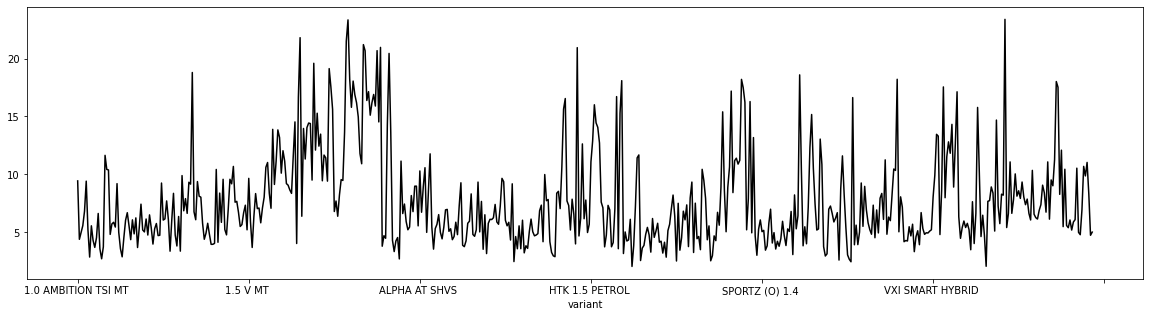

In [19]:
plt.figure(figsize=(20,5))
data.groupby("variant")['Price(in_Lacs)'].mean().plot(kind='line',color='black')

<AxesSubplot:xlabel='Driven_in_km', ylabel='Price(in_Lacs)'>

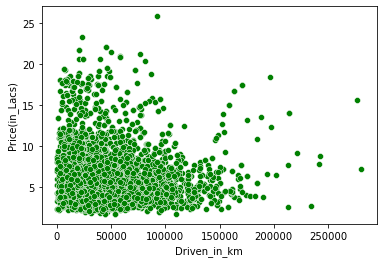

In [42]:
sns.scatterplot(data["Driven_in_km"],data['Price(in_Lacs)'],color="green")

There is slight relations between car driven and prices of cars that car is driven more prices are less.

In [79]:
## Transforming columns foe categorical variables.

encoder=LabelEncoder()
data['Brand']=encoder.fit_transform(data['Brand'])  
data['model']=encoder.fit_transform(data['model'])
data['auto_Mannual']=encoder.fit_transform(data['auto_Mannual'])
data['Fuel']=encoder.fit_transform(data['Fuel'])
data['Location']=encoder.fit_transform(data['Location'])

data['variant']=encoder.fit_transform(data['variant'])

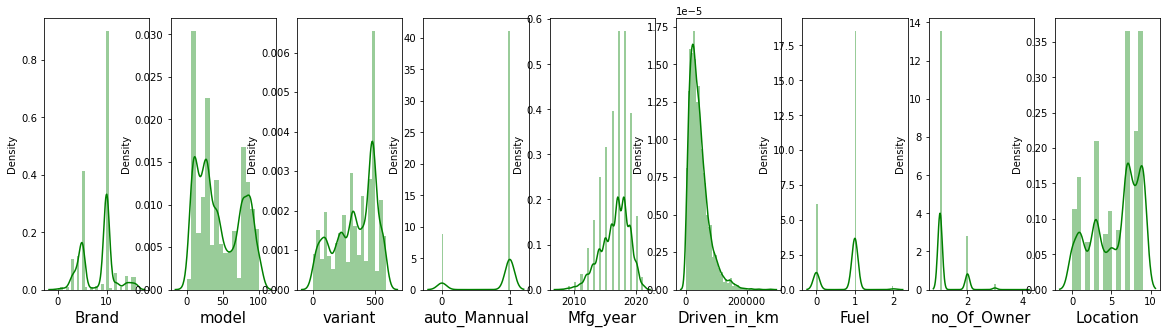

In [45]:
plt.figure(figsize=(20,5))
g=1
for col in data.drop(columns="Price(in_Lacs)"):
    if g<=9:
        ax=plt.subplot(1,9,g)
        sns.distplot(data[col],color="green")
        plt.xlabel(col,fontsize=15)
    g+=1
plt.show()

auto_mannual,Mfg_year,Fuel,no_Of_Owner these columns doesn't seems to normally distributed.

In [29]:
data.skew()

Brand            -0.020164
model             0.336256
variant          -0.467754
auto_Mannual     -1.685726
Mfg_year         -0.610840
Driven_in_km      1.650112
Fuel             -0.873301
no_Of_Owner       2.177280
Location         -0.505111
Price(in_Lacs)    1.909952
dtype: float64

auto_mannual,Mfg_year,Fuel,no_Of_Owner,Location these columns aren't in range of 0.5 to -0.5 . So, these are skewed variablles.

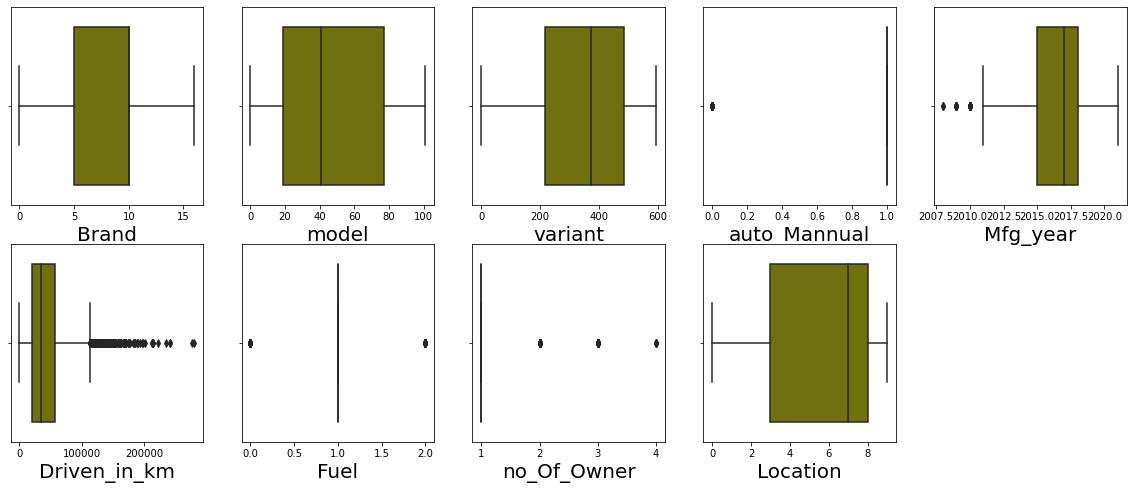

In [30]:
plt.figure(figsize=(20,8))
g=1
for col in data.drop(columns="Price(in_Lacs)"):
    if g<=9:
        ax=plt.subplot(2,5,g)
        sns.boxplot(data[col],color="olive",orient='h')
        plt.xlabel(col,fontsize=20)
    g+=1
plt.show()


In Columnn auto_mannual boxplot shows outliers but this may be because of less no. of reccords for automatic cars

similiarly in columns Mfg_Year, Fuel,no. of Owner

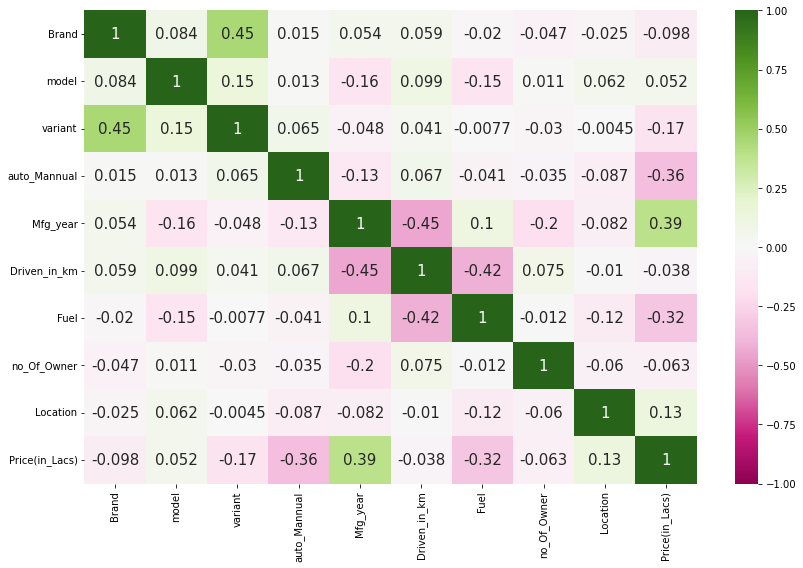

In [80]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),vmax=1,vmin=-1,annot=True,annot_kws={"size":15},cmap="PiYG")
plt.tight_layout()

<AxesSubplot:>

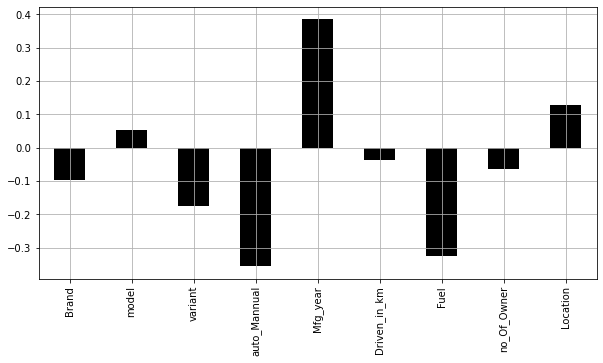

In [32]:
plt.figure(figsize=(10,5))
data.drop("Price(in_Lacs)",axis=1).corrwith(data['Price(in_Lacs)']).plot(kind='bar',grid=True,color='black')

In [33]:
data.shape

(5472, 10)

### Data cleaning

In [46]:
data.drop_duplicates(inplace=True)

In [47]:
data.shape

(5370, 10)

In [48]:
data.describe()

,Brand,model,variant,auto_Mannual,Mfg_year,Driven_in_km,Fuel,no_Of_Owner,Location,Price(in_Lacs)
count,5370.000000,5370.000000,5370.000000,5370.000000,5370.000000,5370.000000,5370.000000,5370.000000,5370.000000,5370.000000
mean,8.347300,45.472626,342.483054,0.821974,2016.575605,42650.099814,0.763687,1.204283,5.616387,6.147359
std,3.364416,30.190913,164.378347,0.382570,2.220051,32674.672637,0.450806,0.452411,2.992875,3.049041
min,0.000000,0.000000,0.000000,0.000000,2008.000000,58.000000,0.000000,1.000000,0.000000,1.720000
25%,5.000000,19.000000,217.000000,1.000000,2015.000000,19679.250000,1.000000,1.000000,3.000000,4.130000
50%,10.000000,41.000000,373.000000,1.000000,2017.000000,35026.000000,1.000000,1.000000,7.000000,5.390000
75%,10.000000,77.000000,483.000000,1.000000,2018.000000,57003.500000,1.000000,1.000000,8.000000,7.150000
max,16.000000,101.000000,593.000000,1.000000,2021.000000,280921.000000,2.000000,4.000000,9.000000,25.860000


As in Column Driven_in_km max value is really high.

In [49]:
##Removing Outliers 

from scipy.stats import zscore

col=['Driven_in_km']
zscore=zscore(data[col])
abs_Zscore=np.abs(zscore)
filtered=(abs_Zscore<3).all(axis=1)
data=data[filtered]

In [50]:
data.shape

(5267, 10)

In [51]:
data.describe()

,Brand,model,variant,auto_Mannual,Mfg_year,Driven_in_km,Fuel,no_Of_Owner,Location,Price(in_Lacs)
count,5267.000000,5267.000000,5267.000000,5267.000000,5267.000000,5267.000000,5267.000000,5267.000000,5267.000000,5267.000000
mean,8.307575,45.382381,342.249098,0.821340,2016.617999,40243.847541,0.773116,1.202962,5.627682,6.134160
std,3.346031,30.260980,164.395017,0.383103,2.203794,27772.066157,0.444802,0.450352,2.987341,3.028317
min,0.000000,0.000000,0.000000,0.000000,2008.000000,58.000000,0.000000,1.000000,0.000000,1.720000
25%,5.000000,19.000000,219.000000,1.000000,2015.000000,19379.500000,1.000000,1.000000,3.000000,4.130000
50%,10.000000,41.000000,371.000000,1.000000,2017.000000,34381.000000,1.000000,1.000000,7.000000,5.390000
75%,10.000000,77.000000,483.000000,1.000000,2018.000000,55063.000000,1.000000,1.000000,8.000000,7.150000
max,16.000000,101.000000,593.000000,1.000000,2021.000000,140642.000000,2.000000,4.000000,9.000000,25.860000


In [52]:
data.skew()

Brand            -0.026060
model             0.346513
variant          -0.472053
auto_Mannual     -1.678202
Mfg_year         -0.621334
Driven_in_km      1.004841
Fuel             -0.915985
no_Of_Owner       2.201820
Location         -0.536311
Price(in_Lacs)    1.925022
dtype: float64

In [53]:
## Reducing Skewness

features=['auto_Mannual','Mfg_year','Driven_in_km','Fuel','no_Of_Owner','Location']
scalar=PowerTransformer(method='yeo-johnson')
data[features]=scalar.fit_transform(data[features].values)
data[features].head()

,auto_Mannual,Mfg_year,Driven_in_km,Fuel,no_Of_Owner,Location
1,0.466392,-2.042148,0.735215,0.448623,2.106865,-1.517599
2,0.466392,-0.307594,-0.000430,0.448623,-0.474218,-1.517599
3,0.466392,0.151334,-0.506217,0.448623,-0.474218,-1.517599
4,0.466392,-0.307594,0.313609,-1.623657,2.106865,-1.517599
5,0.466392,-0.756181,0.627018,0.448623,-0.474218,-1.517599


In [54]:
data.skew()

Brand            -0.026060
model             0.346513
variant          -0.472053
auto_Mannual     -1.678202
Mfg_year         -0.492413
Driven_in_km     -0.034443
Fuel              0.031994
no_Of_Owner       1.634999
Location         -0.425970
Price(in_Lacs)    1.925022
dtype: float64

Here we can see that we have reduced skewness.

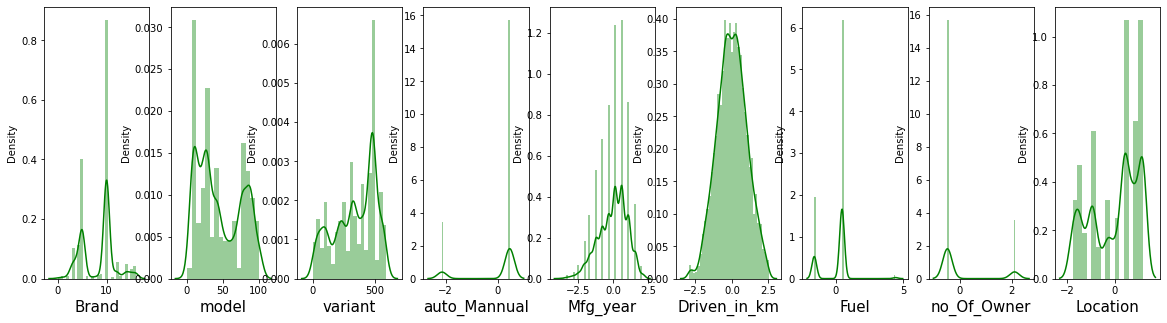

In [56]:
plt.figure(figsize=(20,5))
g=1
for col in data.drop(columns="Price(in_Lacs)"):
    if g<=9:
        ax=plt.subplot(1,9,g)
        sns.distplot(data[col],color="green")
        plt.xlabel(col,fontsize=15)
    g+=1
plt.show()

Now its seems to be more normal distribution than previous.

#### Data Loss

In [57]:
data.shape

(5267, 10)

In [58]:
print(f"Data Loss after Cleaning:{round(((5484-5267)/5484)*100,2)}%")

Data Loss after Cleaning:3.96%


### Model Deployment

In [46]:
X=data.drop("Price(in_Lacs)",axis=1)
Y=data['Price(in_Lacs)']

splitting data into fetures & labels.

Here X is our features & Y is our label.

In [47]:
## Normalizing Both train &test dataset.

scalar=StandardScaler()
X_=scalar.fit_transform(X)

In [48]:
Linear=LinearRegression()
DecisionTree=DecisionTreeRegressor()
RandomForest=RandomForestRegressor()
AdaBoost=AdaBoostRegressor()
Bagging=BaggingRegressor()
SVM=SVR()
algo=[Linear,DecisionTree,Bagging,RandomForest,AdaBoost,SVM]

In [49]:
model_acc_rs={}
maximum_acc=[]
for model in algo:
    max_accuracy=0
    for i in range(160,180,2):
        X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=i)
        model.fit(X_train,Y_train)
        Y_pred=model.predict(X_test)
        accuracy=r2_score(Y_test,Y_pred)*100
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            rs=i
            mae=mean_absolute_error(Y_test,Y_pred)
            mse=mean_squared_error(Y_test,Y_pred)
            rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
    maximum_acc.append(max_accuracy)
    model_acc_rs[model]=[max_accuracy,rs]
    print(f"\n\n{model}:\n---------------------------\n---------------------------\n")
    print(f"The highest accuracy is {max_accuracy} of model {model} at random state {rs}")


    print("\nMEAN ABSOLUTE ERROR:",mae)

    print(f"\nMEAN SQUARED ERROR for the model:",mse)
    
    print(f"\nROOT MEAN SQUARED ERROR for the model:",rmse)



LinearRegression():
---------------------------
---------------------------

The highest accuracy is 42.462700992712335 of model LinearRegression() at random state 176

MEAN ABSOLUTE ERROR: 1.6209490777526465

MEAN SQUARED ERROR for the model: 5.149790310963575

ROOT MEAN SQUARED ERROR for the model: 2.2693149430970516


DecisionTreeRegressor():
---------------------------
---------------------------

The highest accuracy is 91.6656424329129 of model DecisionTreeRegressor() at random state 176

MEAN ABSOLUTE ERROR: 0.42421252371916507

MEAN SQUARED ERROR for the model: 0.7459542694497154

ROOT MEAN SQUARED ERROR for the model: 0.8636864416266562


BaggingRegressor():
---------------------------
---------------------------

The highest accuracy is 92.79883554410101 of model BaggingRegressor() at random state 176

MEAN ABSOLUTE ERROR: 0.43172675521821635

MEAN SQUARED ERROR for the model: 0.6445295066413662

ROOT MEAN SQUARED ERROR for the model: 0.8028259504035518


RandomForestRegres

In [53]:
CVmodel={}

for model in algo:
    CVscore_={}
    print(f"\n{model}")
    print("-"*25)
    print("\n")
    for i in range(3,7):
        cvS=cross_val_score(model,X_,Y,cv=i)
        CVscore_[i]=cvS.mean()
        print(f"Mean CV Score of model {model}:: {cvS.mean()} at k-fold::{i}\n")
    CVdata=pd.DataFrame(CVscore_,index=[""])
    CVmodel[str(model)]=CVdata.max(axis=1).tolist()


LinearRegression()
-------------------------


Mean CV Score of model LinearRegression():: 0.33255876658027544 at k-fold::3

Mean CV Score of model LinearRegression():: 0.3259549572326371 at k-fold::4

Mean CV Score of model LinearRegression():: 0.31754691348896646 at k-fold::5

Mean CV Score of model LinearRegression():: 0.31836342869705364 at k-fold::6


DecisionTreeRegressor()
-------------------------


Mean CV Score of model DecisionTreeRegressor():: 0.7964114221122615 at k-fold::3

Mean CV Score of model DecisionTreeRegressor():: 0.8098664600057051 at k-fold::4

Mean CV Score of model DecisionTreeRegressor():: 0.8224593987315407 at k-fold::5

Mean CV Score of model DecisionTreeRegressor():: 0.7996397837359441 at k-fold::6


BaggingRegressor()
-------------------------


Mean CV Score of model BaggingRegressor():: 0.8443560949550598 at k-fold::3

Mean CV Score of model BaggingRegressor():: 0.8663878531903462 at k-fold::4

Mean CV Score of model BaggingRegressor():: 0.877593013008

In [54]:
CVmodel

{'LinearRegression()': [0.33255876658027544],
 'DecisionTreeRegressor()': [0.8224593987315407],
 'BaggingRegressor()': [0.8775930130084507],
 'RandomForestRegressor()': [0.8889762798787804],
 'AdaBoostRegressor()': [0.41735726205349755],
 'SVR()': [0.5100494951704777]}

Showing maximun cvScore for each model.

In [55]:
m=list(CVmodel.keys())

print("The least difference between the accuracy and CV score of each model is::\n")
for i in range(len(algo)):
    print(f"{m[i]}::{round(np.abs(CVmodel[m[i]][0]*100-maximum_acc[i]),2)}")

The least difference between the accuracy and CV score of each model is::

LinearRegression()::9.21
DecisionTreeRegressor()::9.42
BaggingRegressor()::5.04
RandomForestRegressor()::5.28
AdaBoostRegressor()::13.16
SVR()::6.33


here for model RandomForestRegressor we get the least value i.e. the difference between the accuracy and cvScore of this model is 5.28 .

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=176)

### Plotting regplot graph for RandomForestRegressor model

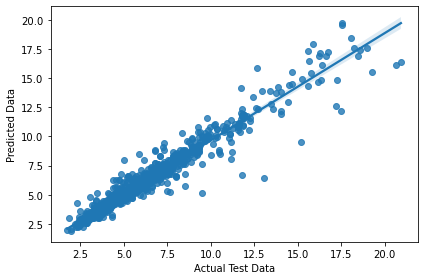

In [57]:
RandomForest.fit(X_train,Y_train)
Y_pred=RandomForest.predict(X_test)
sns.regplot(Y_test,Y_pred)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

Here we analyse that the data points are  close to the best fit line. That means the residual is less.

#### Regularization

In [58]:
lasso=Lasso()
parameters={"alpha":np.arange(0.0001,0.1,0.0002),'normalize':[True,False],'max_iter':[1000,1500,2000]}
grid=GridSearchCV(lasso,parameters)
grid.fit(X_train,Y_train)
grid.best_params_

{'alpha': 0.010300000000000002, 'max_iter': 1000, 'normalize': False}

In [59]:
lasso=Lasso(alpha= 0.0105, max_iter= 1000, normalize=False)
lasso.fit(X_train,Y_train)
pred=lasso.predict(X_test)
r2_score(Y_test,pred)*100

42.426074067304064

Here we can see that our model is not overfitted or underfitted as the r2 scoe Lasso model is 42.42 while the randomforest r2-score is 94.17.

## Hyperparameter Tuning

In [79]:
reg=RandomForestRegressor()
param={
    "n_estimators":[117,96,116],
    "max_depth":[None,21],
    "min_samples_split":[2,4],
    "min_samples_leaf":[1,3],
    "criterion":['squared_error',"mean_absolute_error"],
    "n_jobs":[-1,None]
    
}
grd=GridSearchCV(reg,param_grid=param)
grd.fit(X_train,Y_train)
print("Best Pramaeters:",grd.best_params_)

reg=grd.best_estimator_   #reinstantiating the best parameter to algo

reg.fit(X_train,Y_train)
ypred=reg.predict(X_test)

print(f"The accuracy is {round(r2_score(ypred,Y_test)*100,2)}% of model RandomForest.")


print("\nMEAN ABSOLUTE ERROR:",round(mean_absolute_error(ypred,Y_test),2))

print(f"\nMEAN SQUARED ERROR for the model:",round(mean_squared_error(ypred,Y_test),2))
    
print(f"\nROOT MEAN SQUARED ERROR for the model:",round(np.sqrt(mean_squared_error(ypred,Y_test)),2))

Best Pramaeters: {'criterion': 'squared_error', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 116, 'n_jobs': -1}
The accuracy is 93.33% of model RandomForest.

MEAN ABSOLUTE ERROR: 0.41

MEAN SQUARED ERROR for the model: 0.54

ROOT MEAN SQUARED ERROR for the model: 0.74


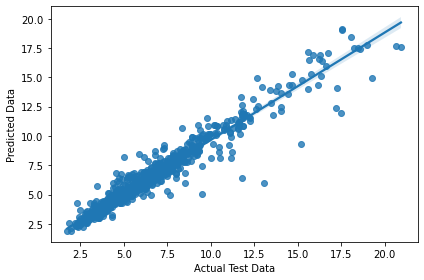

In [521]:
sns.regplot(Y_test,ypred)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

In [80]:
# Saving Model with default parameters.

import pickle
pickle.dump(RandomForest,open("Cars_Price_Prediction.pickle","wb"))